In [635]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
set_config(display='diagram')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from math import sqrt

## El siguiente modelo busca identificar quien o no se va inscribir en el bootcamp.

In [636]:
df = pd.read_csv("cleaned_inscritos.csv")

In [637]:
df

,Entrenamiento,Email,Egresado,Precios US,Incluye pasantia,Primer contacto,Estatus laboral,Razon de retiro,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Primer contacto_Instagram,Primer contacto_WhatsApp,Incluye pasantia_0,Incluye pasantia_1
0,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,Poco tiempo/ Costo del bootcamp / Razones labo...,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,Costo del Bootcamp,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,NaN,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,Inscrito,2900.0,0,Instagram,0,NaN,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,Inscrito,2900.0,0,Instagram,1,NaN,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Cloud Engineer,gmail.com,No inscrito,2900.0,0,WhatsApp,0,Costo del Bootcamp,NaN,Maestros de Talendig,"Luner, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
169,Bootcamp en Desarrollo Web,gmail.com,No inscrito,2900.0,0,WhatsApp,0,Costo del Bootcamp,NaN,Maestros de Talendig,"Lunes, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
170,Bootcamp en Data Science y Machine Learning en...,gmail.com,No inscrito,3450.0,1,WhatsApp,0,NaN,NaN,Maestros de Talendig,"Martes, Jueves y Sabados",0.0,1.0,0.0,1.0
171,Diseno UI/UX,gmail.com,No inscrito,2900.0,0,WhatsApp,0,NaN,NaN,Maestros de Talendig,"Lunes, miercoles y jueves de 7:00 pm a 9:00 pm",0.0,1.0,1.0,0.0


In [638]:
df.nunique()

Entrenamiento                     15
Email                              6
Egresado                           2
Precios US                         5
Incluye pasantia                   2
Primer contacto                    2
Estatus laboral                    2
Razon de retiro                    9
Razon de eleccion del bootcamp     2
Proveedores de bootcamp            2
Horario de los bootcamps          12
Primer contacto_Instagram          2
Primer contacto_WhatsApp           2
Incluye pasantia_0                 2
Incluye pasantia_1                 2
dtype: int64

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entrenamiento                   173 non-null    object 
 1   Email                           173 non-null    object 
 2   Egresado                        173 non-null    object 
 3   Precios US                      173 non-null    float64
 4   Incluye pasantia                173 non-null    int64  
 5   Primer contacto                 173 non-null    object 
 6   Estatus laboral                 173 non-null    int64  
 7   Razon de retiro                 26 non-null     object 
 8   Razon de eleccion del bootcamp  160 non-null    object 
 9   Proveedores de bootcamp         173 non-null    object 
 10  Horario de los bootcamps        173 non-null    object 
 11  Primer contacto_Instagram       173 non-null    float64
 12  Primer contacto_WhatsApp        173 

In [640]:
df1 = df

In [641]:
class preprocesamiento:
 
    def __init__(self, dataset):
        
        self.dataSet = dataset
        
    def deleteColumns(self, obj):
        
        self.dataSet.drop(columns=obj, inplace=True)
        print(f"Columns drops {obj}")
        
        return self.dataSet
        

    def findNullValues(self):
        
        cols = self.dataSet.columns 
        print("*****COUNT OF NULL DATA BY COLUMNS*****\n\n")
        for index in range(0,len(cols)):
            print(f"{ cols[index] } : { len(self.dataSet[cols[index]][self.dataSet[cols[index]].isnull() == True]) } \n")
                   
        
    
    def findAtypical(self):
            
            
            print("*****ATYPICAL DATA *****\n\n")
            catCols = make_column_selector(dtype_include='object')
            
            #Muestra las columnas categoricas para seleccionarlas mas facilmente
            print(catCols(self.dataSet))
            
            colsObj = {}
            reponse = ""
            inputcols =  input("Ingresa las columns categoricas separadas por ',' : ")
            colSplit = inputcols.split(',')
           
            for index in range(0, len(colSplit)):
                
                #Verificar el % de datos
                porcentaje = (len(df1[colSplit[index].strip()]) - len(self.dataSet[colSplit[index].strip()][self.dataSet[colSplit[index].strip()].isnull() == True]) )  / len(self.dataSet[colSplit[index].strip()])
                
                 #Verificar si tienes datos atipicos
                
                colsObj[colSplit[index].strip()] = list(self.dataSet[colSplit[index].strip()].unique()) 
                colsObj[colSplit[index].strip()].append("%{:.2f}".format(porcentaje))
               
               
            #Creamos un string para mostras de maneras mas legible los datos
            for key in colsObj:
                reponse += f"{key} : {colsObj[key]} \n"
               
            print("\n********** RESULTS **********\n")   
            return reponse             
    
    def codingAtypicalData(self,col, key='', value=''):
         
      
        opcion = input(f"Selecciona el tipo de codificacion que desea: \n 1. Codificacion ordinal \n 2. Codificacion OneHotEncoder")
        
        if opcion == "1":
            
            return self.ordinalCoding(col, key, value)
        
        if opcion == "2":
            
            return self.oneCodification(col)
        
       
     
    
    def ordinalCoding(self, col, key, value):
            
        dataSet = self.dataSet
  
        if len(value) == 0:
          
            for key in col.keys():
       
               dataSet[key].replace(col[key], inplace=True)
        
               print(f'Data replaced : \n "{key} : {col[key]}" \n')

        if len(value) == 1:
            
            for index in range(0, len(dataSet[col])):
                
                dataSet[col][index] = re.sub(f"[{key}]", value, dataSet[col][index])    
               

        return dataSet
            
            
    def oneCodification(self, col):
        
        
        for index in range(0, len(col)):
            newValue = self.dataSet[col[index]].mode()
            
            if  (self.dataSet[col[index]].isnull().sum() > 0):

                self.dataSet[col[index]][self.dataSet[col[index]].isnull() == True] = newValue[0]


            ohe = OneHotEncoder(handle_unknown='ignore')

            encoded_data = ohe.fit_transform(self.dataSet[[col[index]]])          

            encoded_df = pd.DataFrame(data=encoded_data.toarray(),columns=ohe.get_feature_names_out(input_features=[col[index]]))                                                        

            self.dataSet = pd.concat([self.dataSet, encoded_df], axis=1)


        return self.dataSet
    
    def emailType(self, col):
        
        dataSet = self.dataSet[col]
        emailCompany = ""
        response = []
        
        for index in range(0,len(dataSet)):
            
            emailCompany = dataSet[index].split('@')  
            self.dataSet[col][index] = emailCompany[1]
       
        return self.dataSet

ready_class = preprocesamiento(df1)

In [642]:
ready_class.findNullValues()

*****COUNT OF NULL DATA BY COLUMNS*****


Entrenamiento : 0 

Email : 0 

Egresado : 0 

Precios US : 0 

Incluye pasantia : 0 

Primer contacto : 0 

Estatus laboral : 0 

Razon de retiro : 147 

Razon de eleccion del bootcamp : 13 

Proveedores de bootcamp : 0 

Horario de los bootcamps : 0 

Primer contacto_Instagram : 0 

Primer contacto_WhatsApp : 0 

Incluye pasantia_0 : 0 

Incluye pasantia_1 : 0 



In [643]:
# Reemplazo y codificacion de los valores atipicos y nulos

codingData = {'Razon de eleccion del bootcamp' : {np.nan:'Otras Razones','Crecimiento laboral / Networking / Aprender algo nuevo / Requirimiento de empleador / Decision propia':'Crecimiento laboral'},
             'Proveedores de bootcamp' : {'Talendig':'Maestros de Talendig'},
             'Razon de retiro': {np.nan:'Otros Motivos'}}

   
ready_class.codingAtypicalData(codingData)

Selecciona el tipo de codificacion que desea: 
 1. Codificacion ordinal 
 2. Codificacion OneHotEncoder1
Data replaced : 
 "Razon de eleccion del bootcamp : {nan: 'Otras Razones', 'Crecimiento laboral / Networking / Aprender algo nuevo / Requirimiento de empleador / Decision propia': 'Crecimiento laboral'}" 

Data replaced : 
 "Proveedores de bootcamp : {'Talendig': 'Maestros de Talendig'}" 

Data replaced : 
 "Razon de retiro : {nan: 'Otros Motivos'}" 



,Entrenamiento,Email,Egresado,Precios US,Incluye pasantia,Primer contacto,Estatus laboral,Razon de retiro,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Primer contacto_Instagram,Primer contacto_WhatsApp,Incluye pasantia_0,Incluye pasantia_1
0,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,Poco tiempo/ Costo del bootcamp / Razones labo...,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,Costo del Bootcamp,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,Inscrito,2900.0,0,Instagram,1,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,Inscrito,2900.0,0,Instagram,0,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,Inscrito,2900.0,0,Instagram,1,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Cloud Engineer,gmail.com,No inscrito,2900.0,0,WhatsApp,0,Costo del Bootcamp,Otras Razones,Maestros de Talendig,"Luner, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
169,Bootcamp en Desarrollo Web,gmail.com,No inscrito,2900.0,0,WhatsApp,0,Costo del Bootcamp,Otras Razones,Maestros de Talendig,"Lunes, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
170,Bootcamp en Data Science y Machine Learning en...,gmail.com,No inscrito,3450.0,1,WhatsApp,0,Otros Motivos,Otras Razones,Maestros de Talendig,"Martes, Jueves y Sabados",0.0,1.0,0.0,1.0
171,Diseno UI/UX,gmail.com,No inscrito,2900.0,0,WhatsApp,0,Otros Motivos,Otras Razones,Maestros de Talendig,"Lunes, miercoles y jueves de 7:00 pm a 9:00 pm",0.0,1.0,1.0,0.0


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entrenamiento                   173 non-null    object 
 1   Email                           173 non-null    object 
 2   Egresado                        173 non-null    object 
 3   Precios US                      173 non-null    float64
 4   Incluye pasantia                173 non-null    int64  
 5   Primer contacto                 173 non-null    object 
 6   Estatus laboral                 173 non-null    int64  
 7   Razon de retiro                 173 non-null    object 
 8   Razon de eleccion del bootcamp  173 non-null    object 
 9   Proveedores de bootcamp         173 non-null    object 
 10  Horario de los bootcamps        173 non-null    object 
 11  Primer contacto_Instagram       173 non-null    float64
 12  Primer contacto_WhatsApp        173 

In [645]:
df['Egresado'].unique()

array(['Inscrito', 'No inscrito'], dtype=object)

In [646]:
df['Egresado'].replace({'Inscrito':0,'No inscrito':1}, inplace=True)
df['Egresado'].value_counts()

0    160
1     13
Name: Egresado, dtype: int64

In [647]:
# Dividir
X = df.drop(columns=['Egresado'])
y = df['Egresado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [648]:
# Preprocesamiento

In [649]:
### Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [650]:
# Scaler
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [651]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [652]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [653]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8633abc10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8637c57f0>)])

In [654]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8633abc10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8637c57f0>)])

In [655]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [656]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot

print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (138, 57)




array([[-2.29117002, -0.57177187, -0.43549417, ...,  0.        ,
         1.        ,  0.        ],
       [-2.29117002, -0.57177187, -0.43549417, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40153132, -0.57177187, -0.43549417, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.40153132,  1.74894926, -0.43549417, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40153132, -0.57177187, -0.43549417, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40153132, -0.57177187, -0.43549417, ...,  1.        ,
         0.        ,  0.        ]])

In [657]:
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [658]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


In [659]:
xgb = xgb.predict(X_test)

In [660]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         2

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



<Figure size 432x288 with 0 Axes>

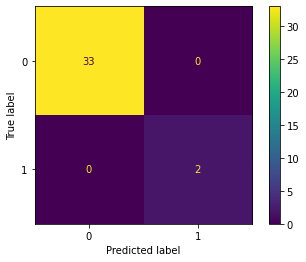

In [661]:
cm = confusion_matrix(y_test,xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

In [677]:
sm = SMOTE(sampling_strategy='auto', k_neighbors = 10)
#Neighbors se refiere a la cantidad de variables y samples que el toma para evaluar


In [ ]:
sm_X_train, sm_y_train = sm.fit_resample(X_train,y_train)
# resample, hacer otro muestreo

In [680]:
xgb_sm.fit(sm_X_train,sm_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [681]:
xgb_sm = xgb_sm.predict(X_test)

In [685]:
len(sm_y_train)
#aqui te imprime el y_train normal

254

In [682]:
len(sm_X_train)

254

In [683]:
len(X_test)

35

In [689]:
sm_y_train.value_counts()

0    127
1    127
Name: Egresado, dtype: int64

In [ ]:
predictions_sm = xgb_sm.predict(X_test)

In [687]:
print(classification_report(y_test,predictions_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         2

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [ ]:
print('Training accuracy:', xgb_sm.score(sm_X_train, sm_y_train))
print('Testing accuracy:', xgb_sm.score(X_test, y_test))